In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [22]:
# charger le dataset
df = pd.read_csv('GHW_HeartFailure_Readmission.csv')
df

,Patient_ID,Age,Gender,Ethnicity,Length_of_Stay,Previous_Admissions,Discharge_Disposition,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days
0,1,83,Male,Other,7,4,Rehab,119,37.1,147,160,99,27,11,0.61,127,13.1,2973,39,0
1,2,73,Female,Hispanic,10,2,Home,107,38.4,54,151,75,13,15,1.48,145,11.4,3220,56,0
2,3,59,Female,White,5,1,Expired,63,39.0,118,112,57,21,26,1.54,147,10.9,1190,50,0
3,4,87,Female,White,8,3,Expired,86,39.2,80,135,55,27,34,1.63,133,10.1,2934,29,1
4,5,52,Female,Asian,1,1,Home,117,38.5,94,145,79,16,32,2.57,146,12.8,4324,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,79,Female,Black,5,0,Home,114,36.3,82,111,79,29,25,2.55,138,12.6,2700,43,0
996,997,65,Female,Other,8,2,Nursing Facility,80,37.4,80,146,58,17,38,2.56,143,15.3,2780,47,1
997,998,81,Female,Black,6,2,Expired,79,38.4,103,151,55,22,13,0.67,133,13.0,4470,67,0
998,999,49,Male,Other,14,4,Expired,67,36.8,93,171,74,29,34,0.93,128,15.6,4938,51,0


In [23]:
# colonnes a valeurs manquantes 
df.isnull().sum().sort_values(ascending=False)

Patient_ID               0
Age                      0
Ejection_Fraction        0
NT_proBNP                0
Hemoglobin               0
Sodium                   0
Creatinine               0
BUN                      0
Respiratory_Rate         0
Diastolic_BP             0
Systolic_BP              0
Heart_Rate               0
Temperature              0
Pulse                    0
Discharge_Disposition    0
Previous_Admissions      0
Length_of_Stay           0
Ethnicity                0
Gender                   0
Readmission_30Days       0
dtype: int64

In [24]:
#  Imputer les valeurs manquantes par la médiane pour les numériques.
df.fillna(df.median(numeric_only=True), inplace=True)

In [32]:
df.select_dtypes(['int', 'float'])

,Patient_ID,Age,Length_of_Stay,Previous_Admissions,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days
0,1,83,7,4,119,37.1,147,160,99,27,11,0.61,127,13.1,2973,39,0
1,2,73,10,2,107,38.4,54,151,75,13,15,1.48,145,11.4,3220,56,0
2,3,59,5,1,63,39.0,118,112,57,21,26,1.54,147,10.9,1190,50,0
3,4,87,8,3,86,39.2,80,135,55,27,34,1.63,133,10.1,2934,29,1
4,5,52,1,1,117,38.5,94,145,79,16,32,2.57,146,12.8,4324,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,79,5,0,114,36.3,82,111,79,29,25,2.55,138,12.6,2700,43,0
996,997,65,8,2,80,37.4,80,146,58,17,38,2.56,143,15.3,2780,47,1
997,998,81,6,2,79,38.4,103,151,55,22,13,0.67,133,13.0,4470,67,0
998,999,49,14,4,67,36.8,93,171,74,29,34,0.93,128,15.6,4938,51,0


In [37]:
features = ['Age', 'Length_of_Stay', 'Previous_Admissions', 'Pulse', 'Temperature',
            'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN',	
            'Creatinine', 'Sodium',	'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction',	
            'Readmission_30Days']

In [49]:
# fonction pour visualiser nos donnees
def boxplots(df):
    plt.figure(figsize=(20,6))
    sns.boxplot(data=df)
    plt.show()

c:\Users\ZhuanZ\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


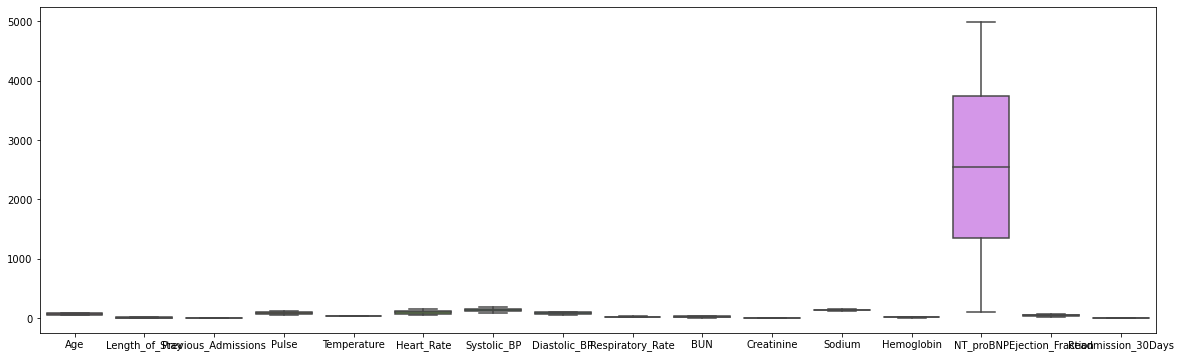

In [50]:
boxplots(df[features])

In [55]:
# detecter les valeurs aberrantes par l'intervalle interquartile
def detect_outliers(data, features):
    Q1 = data[features].quantile(0.25) 
    Q3 = data[features].quantile(0.75) 
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    return data[(data[features] < lower_bound) | (data[features] > upper_bound)]

In [56]:
for feature in features:
    show_detect_outliers = detect_outliers(df, features)

In [57]:
show_detect_outliers[features].shape

(0, 16)

In [58]:
# supprimer les valeurs aberrantes
def drop_outliers(data, features):
    q1 = data[features].quantile(0.25)
    q3 = data[features].quantile(0.75)
    
    limit = 1.5 * (q3 - q1)
    
    data.drop(data[data[features] > limit + q3].index, inplace=True)
    data.drop(data[data[features] > q1 - limit].index, inplace=True)

In [59]:
for feature in features:
    drop_outliers(df, feature)

c:\Users\ZhuanZ\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


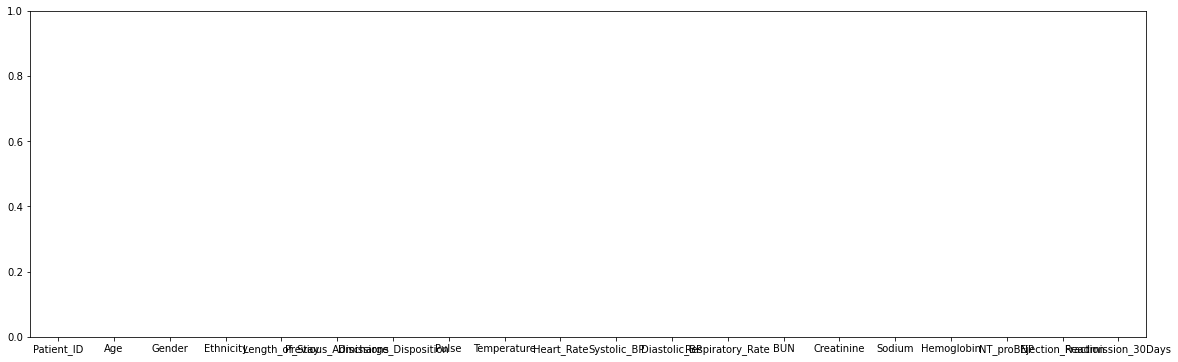

In [60]:
boxplots(df)